<a href="https://colab.research.google.com/github/heshChamika/Data_analyze/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Csv files/Mall_Customers.csv')

In [4]:
data.sample(5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
96,97,Female,47,60,47
175,176,Female,30,88,86
86,87,Female,55,57,58
51,52,Male,33,42,60
193,194,Female,38,113,91


In [9]:
data = data[['Annual Income (k$)','Spending Score (1-100)']]

In [10]:
data.sample(5)

,Annual Income (k$),Spending Score (1-100)
188,103,17
186,101,24
38,37,26
173,87,92
93,60,40


In [11]:
data = data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'})

In [12]:
data.sample(5)

,Income,Score
104,62,56
142,76,40
69,48,47
121,67,40
118,67,43


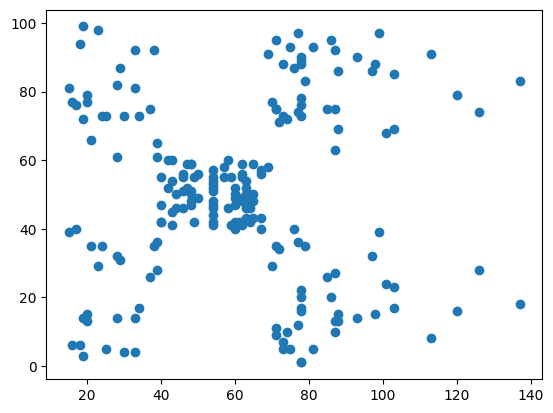

In [13]:
import matplotlib.pyplot as plt
plt.scatter(data['Income'],data['Score'])

In [21]:
from sklearn.cluster import KMeans

In [22]:
k_values = [1,2,3,4,5,6,7,8,9,10]
wcss_error = []
for k in k_values:
  model = KMeans(n_clusters=k)
  model.fit(data[['Income','Score']])
  wcss_error.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
wcss_error

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37271.88623658949,
 30273.394312070042,
 25011.839349156588,
 21818.114588452176,
 19634.554629349976]

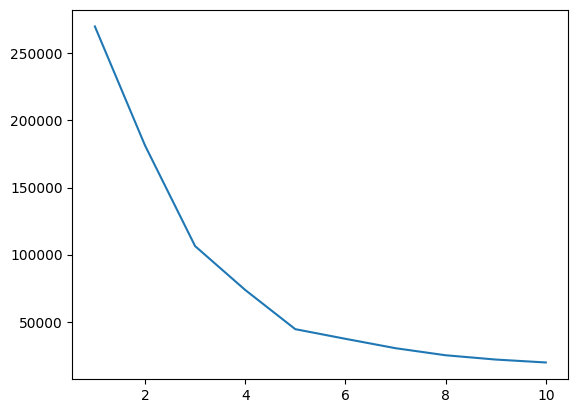

In [24]:
plt.plot(k_values,wcss_error)

In [25]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
pred = model.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

In [20]:
data['cluster'] = pred
data.head(5)

,Income,Score,cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [27]:
c1 = data[data['cluster']==0]
c2 = data[data['cluster']==1]
c3 = data[data['cluster']==2]
c4 = data[data['cluster']==3]
c5 = data[data['cluster']==4]

In [28]:
c4.head()

,Income,Score,cluster
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3


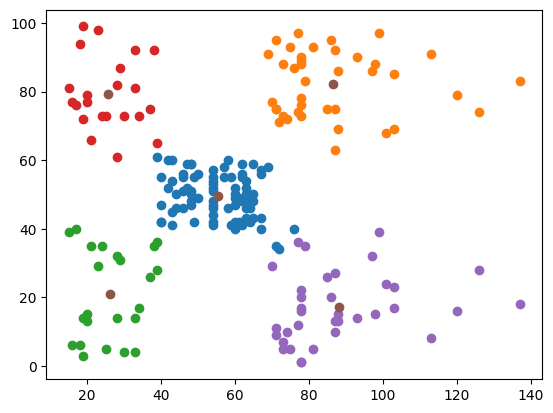

In [31]:
plt.scatter(c1['Income'],c1['Score'])
plt.scatter(c2['Income'],c2['Score'])
plt.scatter(c3['Income'],c3['Score'])
plt.scatter(c4['Income'],c4['Score'])
plt.scatter(c5['Income'],c5['Score'])
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1])

In [30]:
model.cluster_centers_

array([[8.82000000e+01, 1.71142857e+01, 4.00000000e+00],
       [5.52962963e+01, 4.95185185e+01, 1.55431223e-15],
       [2.63043478e+01, 2.09130435e+01, 2.00000000e+00],
       [2.57272727e+01, 7.93636364e+01, 3.00000000e+00],
       [8.65384615e+01, 8.21282051e+01, 1.00000000e+00]])